<a href="https://colab.research.google.com/github/chuangchai159/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [15]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [16]:
Name = 'ช่วงชัย จันทร์มณี'
ID = '6230205195'

In [17]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [18]:
Data = DataGenerator(Name,ID)

020:30:17


In [19]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.158735,5.690950,4.721809,6.845420,-8.818586,8.674218,9.817295,-3.479546,4.282967,-0.384355,-0.777516,3.675601,8.829940,6.405371,9.966592,3.992198,-8.064268,6.985899,-3.773405,4.839581,8.553680,-0.406223,6.176259,9.658190,9.726215,-4.928476,-5.672280,-6.643199,0.836293,7.008406,11.381901,37.042030
1,0.237897,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368,-17.417686,-49.091842
2,4.866806,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404,16.837979,20.292018
3,-1.136705,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941,-5.428770,43.144703
4,-1.028214,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333,10.390004,-19.656667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.209858,-2.107553,-4.876959,10.332166,0.019237,4.050258,-7.719833,5.508394,3.089267,5.008145,6.739258,5.463149,-1.630533,7.428161,-10.264293,7.334081,5.689646,-0.106500,2.801250,10.591213,-1.641509,-0.452060,-0.190323,5.139647,-9.441470,-8.238742,-8.528449,7.575231,-3.882827,2.627791,-4.215105,15.138955
9996,0.820607,3.711509,-4.954779,-3.238819,5.206296,-8.180974,-4.673332,-6.915658,-4.080469,3.522967,-8.631682,-1.238047,2.032672,-0.882564,-3.215082,3.016409,7.209913,-1.716118,-9.207724,8.560131,6.654362,-3.806772,4.960512,0.399443,4.292408,-9.222095,-9.273189,10.454157,7.079641,-7.743286,7.423018,-36.716428
9997,-10.583808,4.730278,-1.744426,-9.567553,-4.061406,7.446723,-5.974800,-7.825554,-4.524337,9.447843,3.253149,1.498652,1.186343,6.623139,-0.089589,3.669097,5.374887,8.916595,-9.863856,-5.804452,4.260478,3.077116,-4.209442,3.385056,2.103282,-5.786865,5.315729,-6.066785,8.830470,-11.027183,9.460556,-53.135914
9998,1.642318,2.744377,2.768039,7.493199,-3.545052,-9.842654,7.303738,6.927084,-0.353955,7.699033,-2.400825,8.442161,3.262577,1.571756,10.392827,9.759724,8.022491,-3.123120,-10.138046,9.233163,-8.774336,-3.707826,-3.129864,9.677015,-7.495096,-4.406123,-1.974531,-7.448938,1.370353,-8.520655,5.488755,-40.603276


ตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data เพื่อการเตรียมข้อมูลก่อนจะนำไปใช้ 

In [ ]:
Data.shape # เช็คขนาดของข้อมูล

(10000, 32)

In [52]:
corr = np.corrcoef(Data.to_numpy().T) # คำสั่ง correlation

In [ ]:
corr.shape

(32, 32)

In [71]:
for i in range(corr.shape[0]): #หาค่า correlation ที่ซ้ำกัน ด้วยการวนลูป
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0


จากการวนลูป พบว่า correlation มีตัวซ้ำกัน จึงต้องตัดข้อมูลที่ซ้ำกันออกก่อน

In [72]:
Data.iloc[1:,:30]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
1,0.237897,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368
2,4.866806,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404
3,-1.136705,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941
4,-1.028214,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333
5,2.284672,6.436815,7.319322,6.899683,-10.991830,4.196513,-3.766400,-0.346242,3.155199,-6.658742,-4.282612,4.992000,6.799950,7.331745,6.418371,-9.913139,-10.048897,6.341164,-6.681705,-5.473404,6.878734,8.649846,0.989413,-6.370054,5.196992,0.207630,3.661557,5.498240,0.532667,-0.917574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.209858,-2.107553,-4.876959,10.332166,0.019237,4.050258,-7.719833,5.508394,3.089267,5.008145,6.739258,5.463149,-1.630533,7.428161,-10.264293,7.334081,5.689646,-0.106500,2.801250,10.591213,-1.641509,-0.452060,-0.190323,5.139647,-9.441470,-8.238742,-8.528449,7.575231,-3.882827,2.627791
9996,0.820607,3.711509,-4.954779,-3.238819,5.206296,-8.180974,-4.673332,-6.915658,-4.080469,3.522967,-8.631682,-1.238047,2.032672,-0.882564,-3.215082,3.016409,7.209913,-1.716118,-9.207724,8.560131,6.654362,-3.806772,4.960512,0.399443,4.292408,-9.222095,-9.273189,10.454157,7.079641,-7.743286
9997,-10.583808,4.730278,-1.744426,-9.567553,-4.061406,7.446723,-5.974800,-7.825554,-4.524337,9.447843,3.253149,1.498652,1.186343,6.623139,-0.089589,3.669097,5.374887,8.916595,-9.863856,-5.804452,4.260478,3.077116,-4.209442,3.385056,2.103282,-5.786865,5.315729,-6.066785,8.830470,-11.027183
9998,1.642318,2.744377,2.768039,7.493199,-3.545052,-9.842654,7.303738,6.927084,-0.353955,7.699033,-2.400825,8.442161,3.262577,1.571756,10.392827,9.759724,8.022491,-3.123120,-10.138046,9.233163,-8.774336,-3.707826,-3.129864,9.677015,-7.495096,-4.406123,-1.974531,-7.448938,1.370353,-8.520655


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

จะใช้วิธี Kmean วัดระยะห่างของข้อมูลเพื่อจัดกลุ่ม

In [73]:
# ขั้นตอนที่ 1 Import sklearn.cluster ที่ใช้ในการทำ Kmean
from sklearn.cluster import KMeans

In [74]:
# ขั้นตอนที่ 2 Define กำหนดค่า kmean ให้เป็นจุดเดียวกัน random_state=2021 คือกำหนดเพื่อให้เริ่มสุ่มที่จุดเดียวกัน
kmeans = KMeans(n_clusters=3,random_state=2021)

In [75]:
# ขั้นตอนที่ 3 Fit-tranform คำนวณจุด Cluster center ของข้อมูล Data
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [76]:
# ขั้นตอนที่ 4 แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[ -1.85442419,  -2.49546217,   0.54056044,  -0.45751927,
         -0.71171338,  -1.28077175,  -2.89079564,  -2.54740994,
         -2.55722625,   3.94029599,  -0.15030124,   2.12191856,
          3.26920044,   2.95811275,  -0.69370364,   4.15164998,
          3.76679921,   3.25213512,  -6.38482485,   0.90784619,
         -0.88084478,  -0.47777766,  -1.62704005,   1.22262411,
         -0.12064098,  -2.23780288,  -2.2587377 ,  -0.862645  ,
          2.70678762,  -7.82750253,  -4.99092434, -37.13751264],
       [  2.38570013,  -3.55048966,  -0.32400704,   4.42755616,
         -1.6258169 ,   6.10699732,   4.72011989,  -1.98533052,
         -2.96378556,  -2.10680713,   2.52876938,  -0.47734385,
          1.46707661,   2.82040179,   5.93317781,   1.8229728 ,
         -0.3034035 ,   3.13664195,   5.11441409,  -0.44402306,
          0.54738871,   2.01444337,   3.89920163,   1.43979966,
          6.15088301,   0.28836908,  -1.0935284 ,   0.94110678,
         -0.97120011,   7.10513977,  -7

In [77]:
#ขั้นตอนที่ 5 ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)
y

array([1, 0, 2, ..., 0, 0, 2], dtype=int32)

In [78]:
#ขั้นตอนที่ 6 ทำ PCA ลด Dimention
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2) #กำหนด Dimension = 2

In [80]:
new_pca = pca.fit_transform(Data)

In [81]:
#plot กราฟเพื่อดูการกระจายกลุ่ม
import matplotlib.pyplot as plt

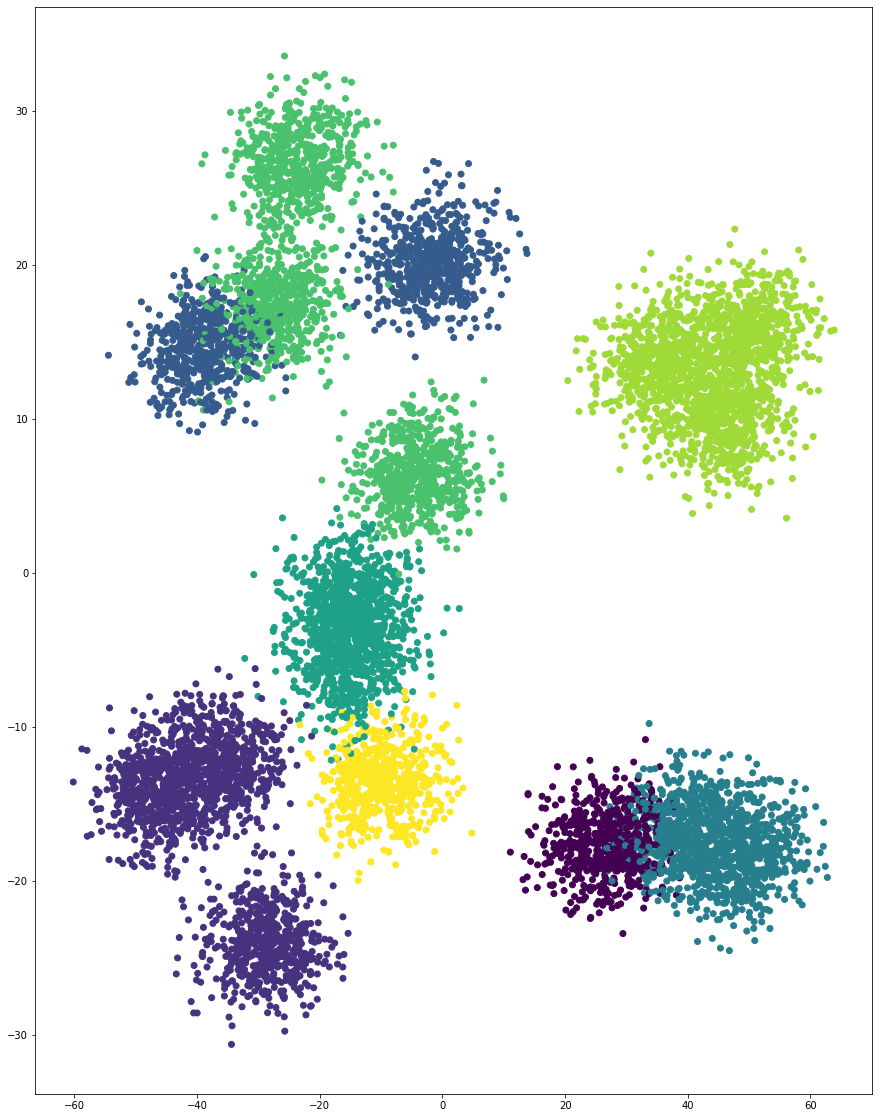

In [82]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

ได้กราฟจับกลุ่มกัน 8 กลุ่ม เนื่องจากมีมากเกินไปจึงทำการหาจำนวนแบ่งกลุ่มที่เหมาะสมของข้อมูล

# หาค่า k ที่เหมาะสมของ data ด้วยวิธี " The elbow method "

In [83]:
#คำนวนค่า SSE ของ data เพื่อดูความคลาดเคลื่อน
kmeans.inertia_ 

5943277.096330681

In [84]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [85]:
SSE

[21731535.631323054,
 12416307.521962563,
 10702262.182147296,
 9562086.00100026,
 8580416.365484318,
 7614252.230429327,
 6795369.177308947,
 5943277.096330681]

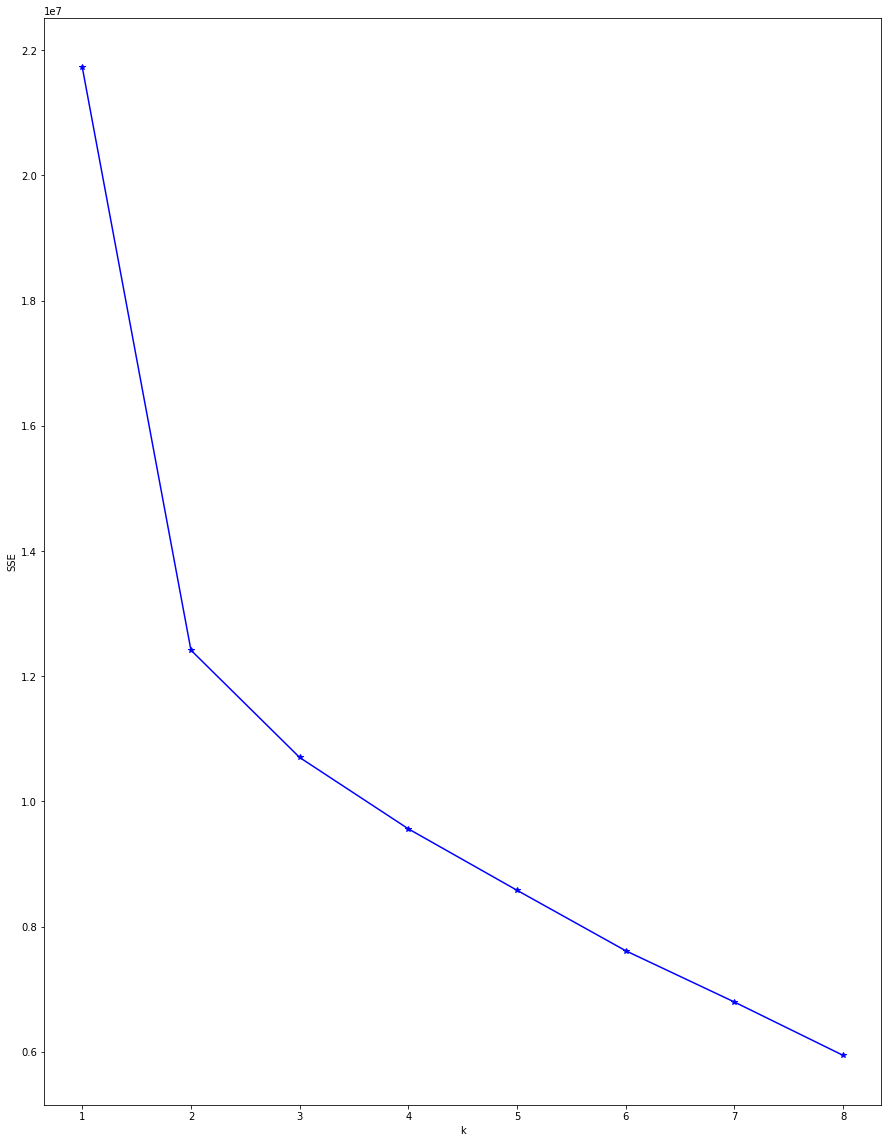

In [86]:
#นำค่า SSE มา plot กราฟเพื่อดูว่ามีกี่กลุ่ม
plt.plot([1,2,3,4,5,6,7,8],SSE,'*-b')
plt.xlabel('k')
plt.ylabel('SSE');

*จากกราฟจะเห็นได้ว่า k มี 3 กลุ่ม ดูจากจุดที่ k italicized text *italicized text*

### หาค่า k ที่เหมาะสม โดยใช้วิธี Silhouette

In [87]:
#import function metrics 
from sklearn import metrics

In [91]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

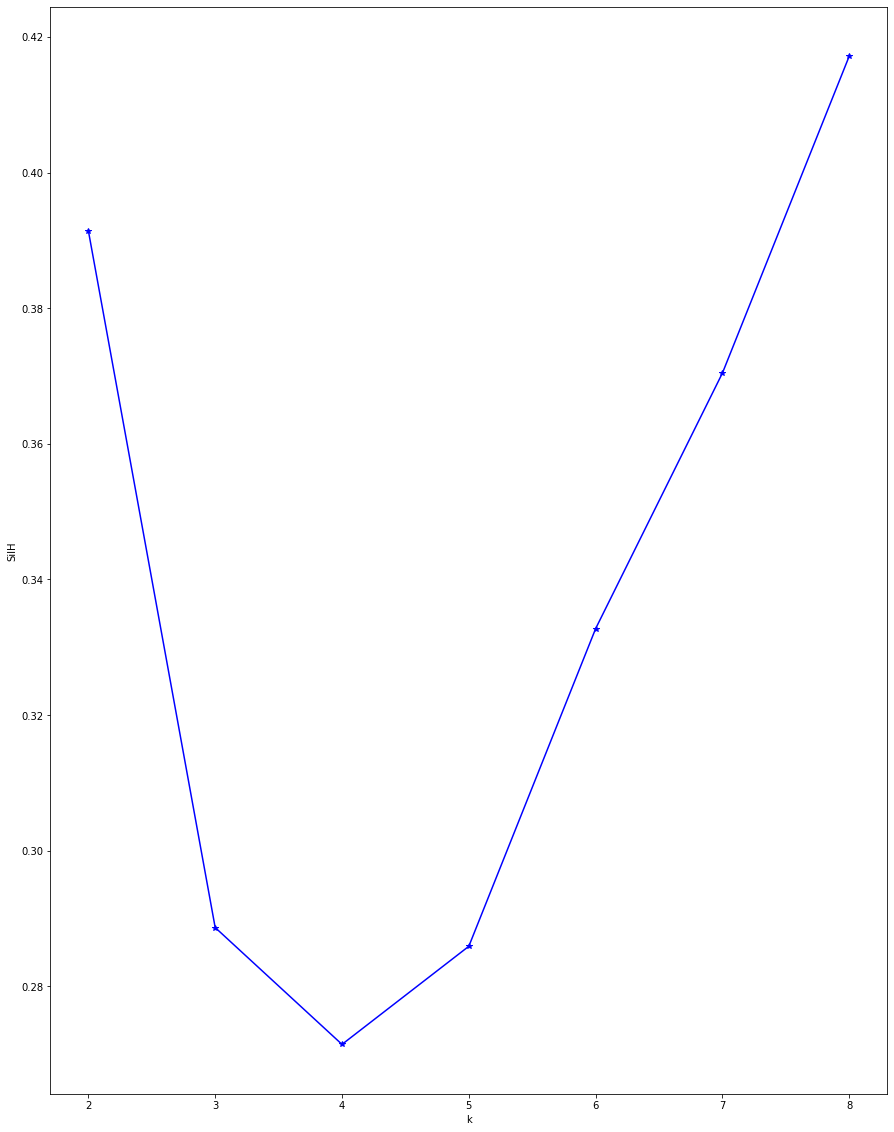

In [94]:
plt.plot([2,3,4,5,6,7,8],SilH,'*-b')
plt.xlabel('k')
plt.ylabel('SilH');

จุดที่มี Silhouette score สูงสุด จะดีที่สุด จากกราฟ  k=8 Silhouette score=0.42  หมายความว่ามีความใกล้กันของ Dataในกลุ่มเดียวกันมาก และความห่างกันของกลุ่ม Data มาก

In [95]:
# กำหนดขนาดกราฟ เพื่อดูข้อมูลได้ชัดเจนมากขึ้น
plt.rcParams['figure.figsize']=[15,20] 

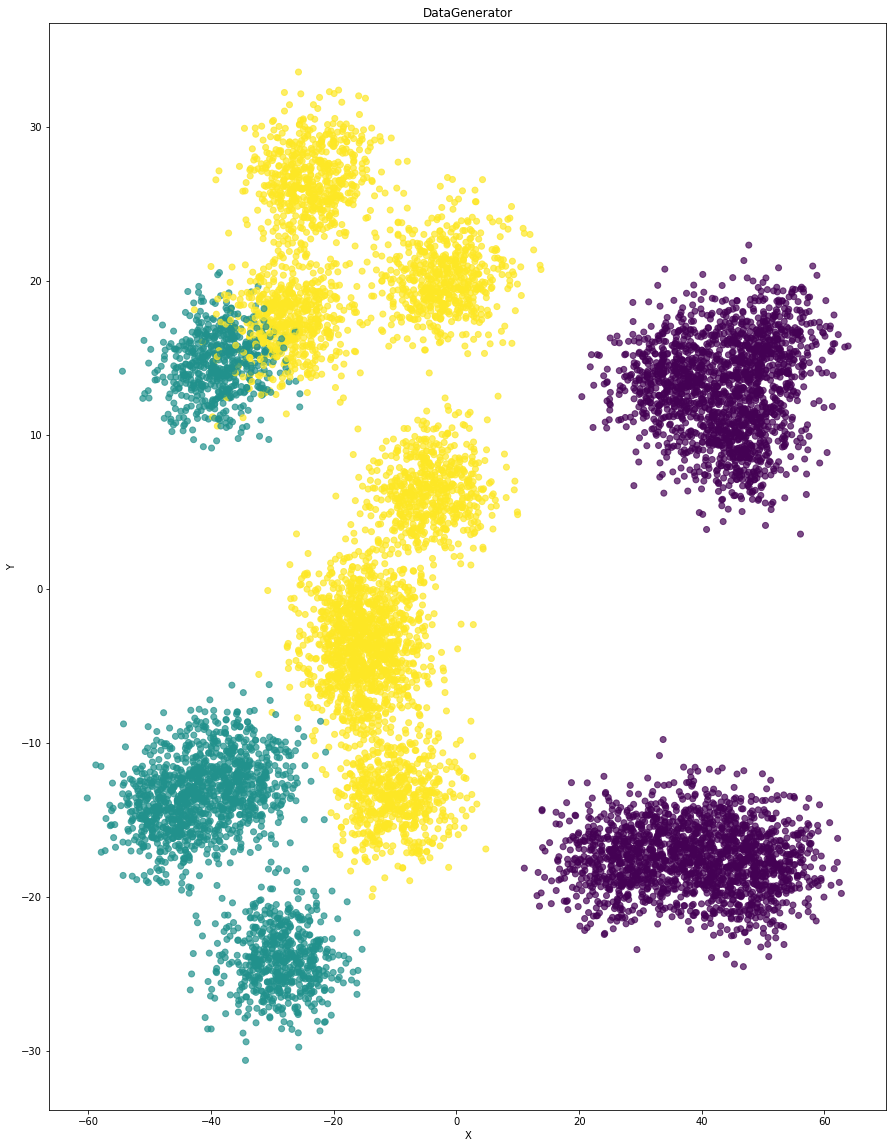

In [96]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

# 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

### MDS

In [45]:
# ขั้นตอนที่ 1 import
from sklearn.manifold import MDS

In [46]:
# ขั้นตอนที่ 2 define
mds = MDS(n_components=2)
# กำหนด components ของ mds เป็น 2

In [47]:
# ขั้นตอนที่ 3 fit transform
New_mds = mds.fit_transform(Data)
# คำนวณระยะห่างระหว่างจุด

### K-means

In [48]:
# ขั้นตอนที่ 4 Kmean วัดระยะห่างเพื่อจัดกลุ่มระหว่างจุดข้อมูล
kmeans2 = KMeans(n_clusters=4,random_state=2021)  # ให้ k = 4
kmeans2.fit(Data)
g = kmeans2.predict(Data)

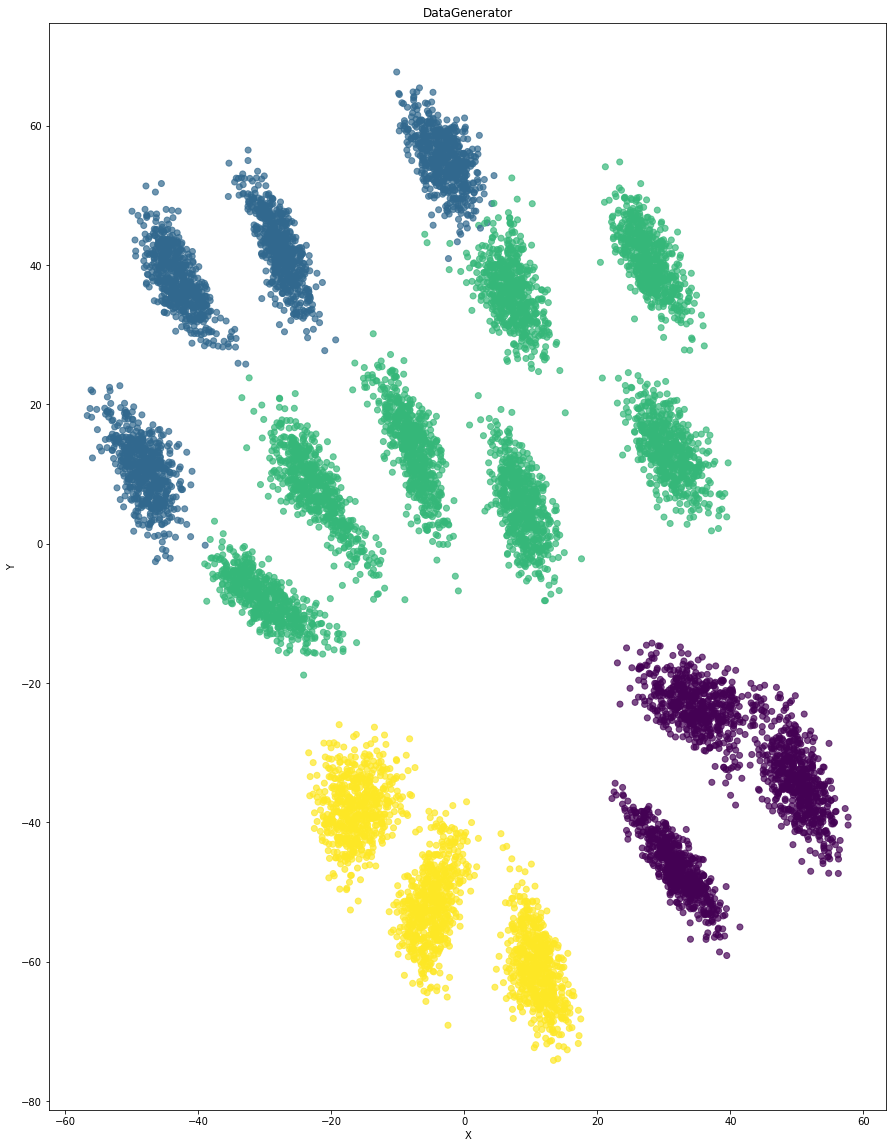

In [49]:
#กำหนดกลุ่ม k = 4 หาค่า k ที่เหมาะสม
plt.scatter(New_mds[:,0],New_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

# 4.เปรียบเทียบความแตกต่างของผลข้อ 2 กับ ข้อ 3


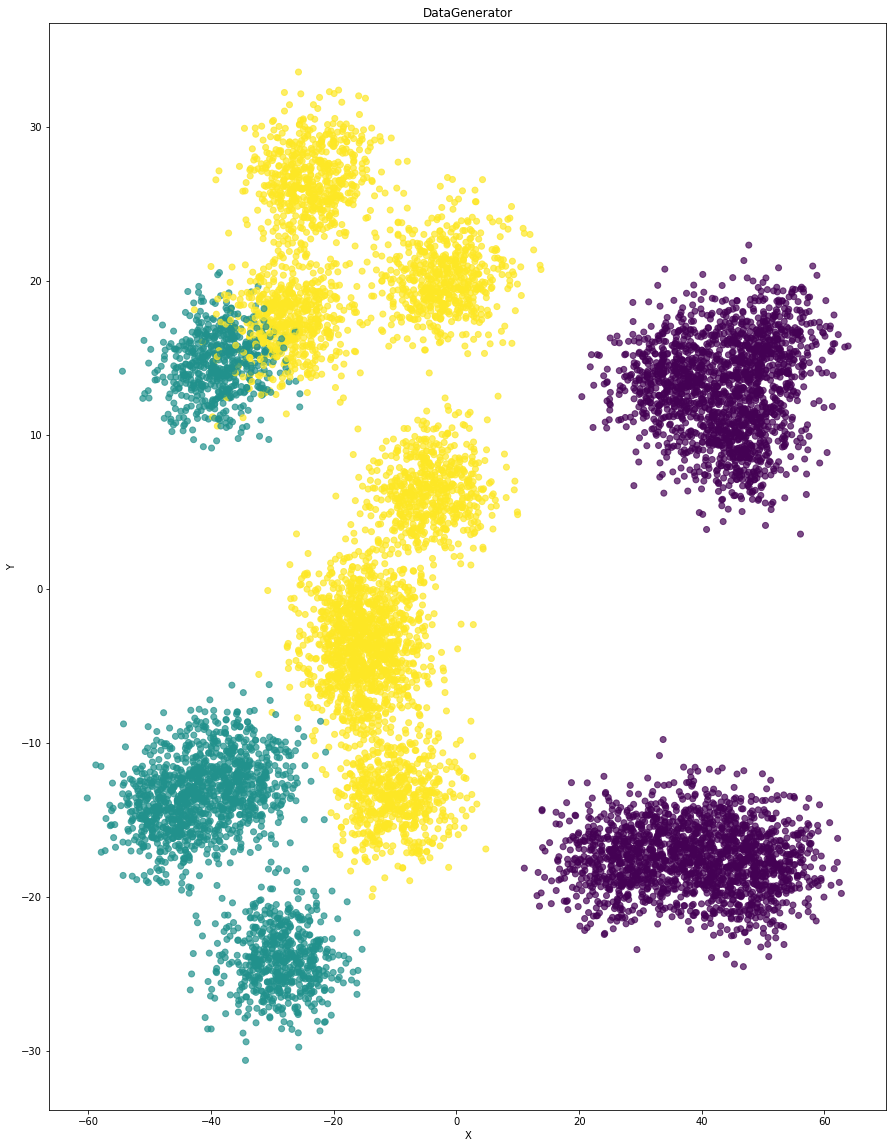

In [97]:
# ข้อ จัดกลุ่มโดย clustering แล้วลด dimension ด้วย PCA เป็นการลด dimension แต่ข้อมูลยังอยูาที่เดิม
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

ข้อ 2 จัดกลุ่มโดย clustering แล้วลด dimension ด้วย PCA เป็นการลด dimension แต่ข้อมูลยังอยูาที่เดิม


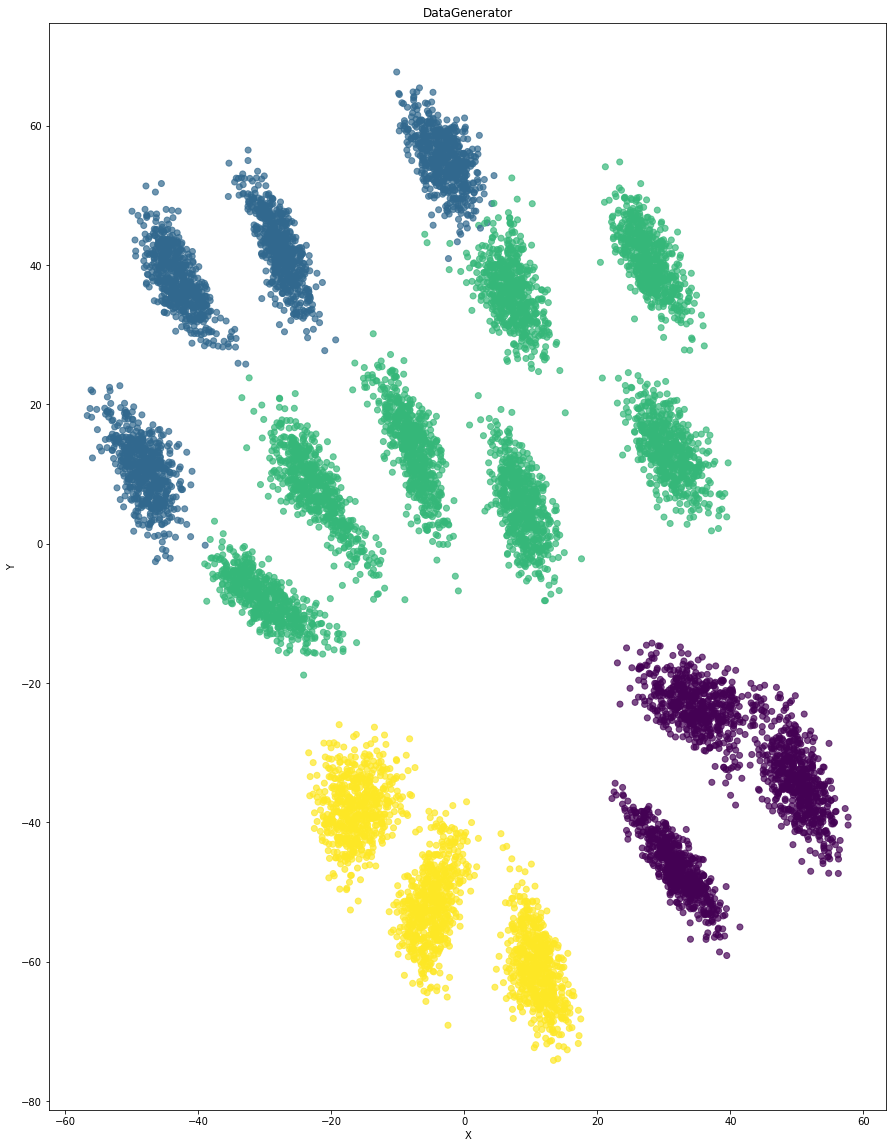

In [70]:
# #ข้อ 3 ลด dimension ของข้อมูลแล้ว นำข้อมูลที่ dimension แล้วไป clustering เป็นการลด dimension ด้วยวิธี MDS ทำให้จุดของข้อมูลอยู่ที่จุดตั้งต้น
plt.scatter(New_mds[:,0],New_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');